# Mark 4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

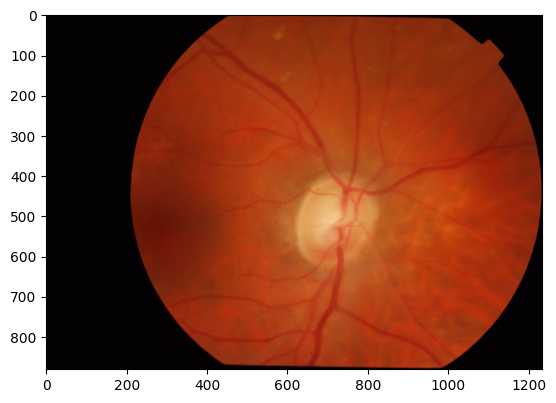

In [39]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_drishti.png')
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
plt.imshow(hrf_res)

In [40]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [41]:
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

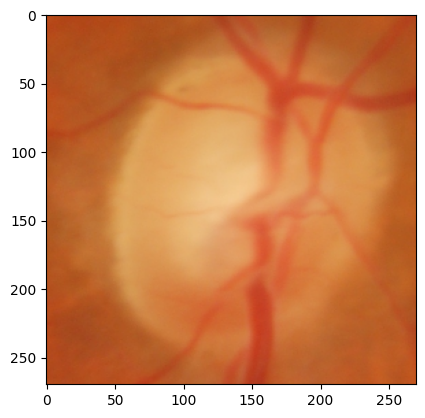

In [42]:
plt.imshow(roi)

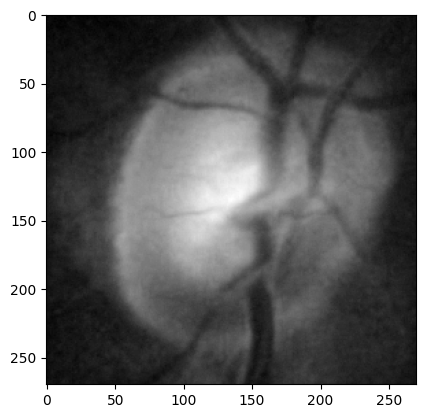

In [43]:
plt.imshow(roi[:,:,2], 'gray')

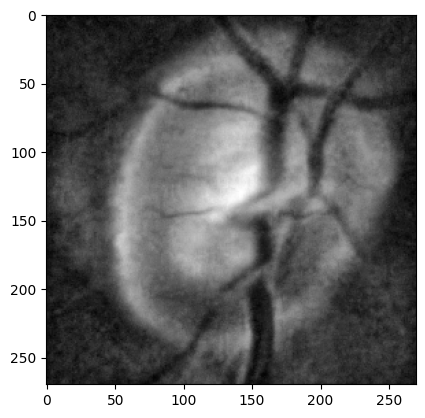

In [44]:
clahe = cv2.createCLAHE(2.5, (8,8))
roiclahe = clahe.apply(roi[:,:,2].copy())
plt.imshow(roiclahe, 'gray')

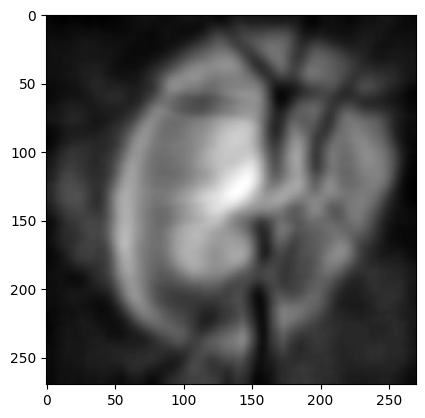

In [45]:
blurred = cv2.blur(roiclahe.copy(), (13,15))
plt.imshow(blurred, 'gray')

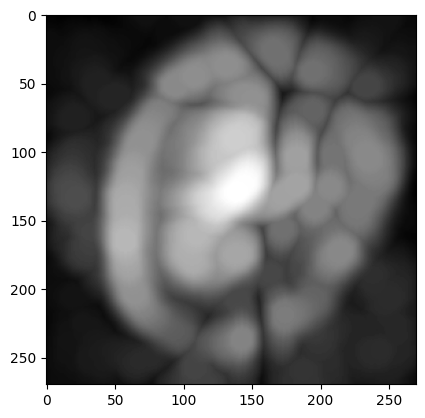

In [46]:
dkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (13,13))
dilation = cv2.dilate(blurred.copy(), dkernel)
plt.imshow(dilation, 'gray')

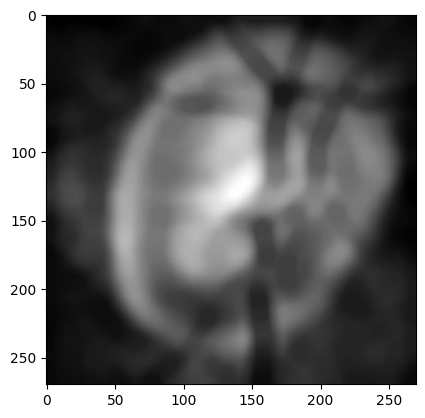

In [47]:
ekernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
erosion = cv2.erode(dilation.copy(), ekernel)
plt.imshow(erosion, 'gray')

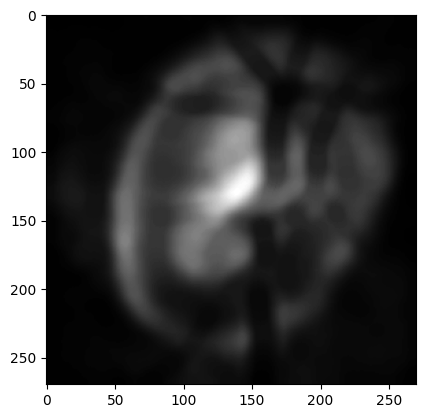

In [48]:
gmc = adjust_gamma(erosion.copy(), 2.5)
plt.imshow(gmc, 'gray')

In [49]:
ret2,th2 = cv2.threshold(gmc,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

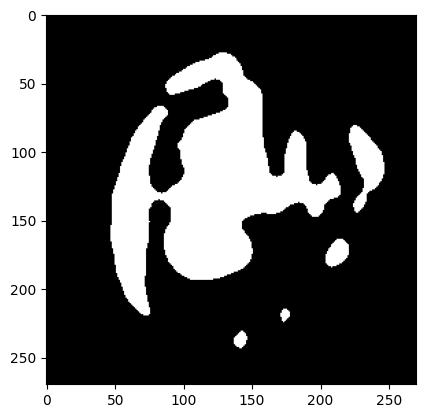

In [50]:
plt.imshow(th2, 'gray')

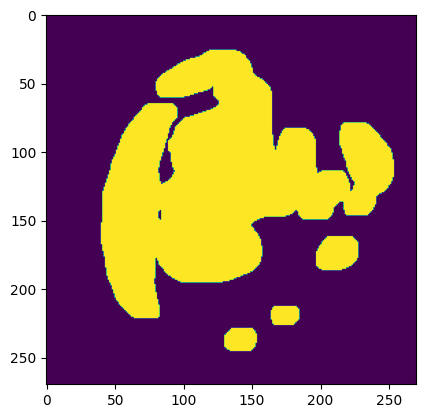

In [51]:
dilated_again = cv2.dilate(th2.copy(), np.ones((5,15), np.uint8))
plt.imshow(dilated_again)

In [52]:
contours,_ = cv2.findContours(th2.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [53]:
areas = [cv2.contourArea(c) for c in contours]
sorted_areas = np.sort(areas)

#bounding box (red)
cnt=contours[areas.index(sorted_areas[-1])] #the biggest contour
r = cv2.boundingRect(cnt)
roi = cv2.rectangle(roi.copy(),(r[0],r[1]),(r[0]+r[2],r[1]+r[3]),(0,0,255),2)

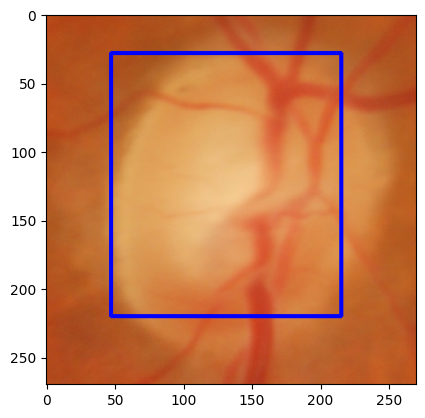

In [54]:
plt.imshow(roi)

In [55]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
roi = cv2.circle(roi,center,radius,(0,255,0),2)

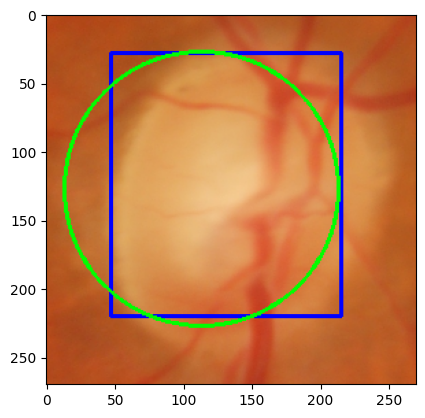

In [56]:
plt.imshow(roi)